In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle
import numpy
import itertools

2025-07-17 12:28:42.167777: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-17 12:28:42.180607: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752773322.196115 1101984 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752773322.200659 1101984 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752773322.212248 1101984 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
with open("dataset_train.pkl", "rb") as f:
    X_train, y_train = pickle.load(f)
with open("dataset_test.pkl", "rb") as f:
    X_test, y_test = pickle.load(f)

In [3]:
a=32
num_feats = X_train.shape[1]
model = Sequential([
    Input(shape=(num_feats,)),
    Dense(a, activation="relu"),
    Dense(a, activation="relu"),
    Dense(a, activation="relu"),
    Dense(1, activation="sigmoid")
])

I0000 00:00:1752773324.686315 1101984 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22134 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


In [4]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
history = model.fit(X_train, y_train,validation_split=0.05,epochs=20)

Epoch 1/20


I0000 00:00:1752773326.441300 1102065 service.cc:152] XLA service 0x7e4db400b020 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752773326.441317 1102065 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-07-17 12:28:46.464331: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1752773326.665549 1102065 cuda_dnn.cc:529] Loaded cuDNN version 90300


113/416 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5293 - loss: 10.3083

I0000 00:00:1752773327.317009 1102065 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


416/416 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5662 - loss: 5.0275 - val_accuracy: 0.6243 - val_loss: 0.9680
Epoch 2/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6368 - loss: 0.9271 - val_accuracy: 0.6157 - val_loss: 0.7935
Epoch 3/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6388 - loss: 0.8626 - val_accuracy: 0.6857 - val_loss: 0.7405
Epoch 4/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6443 - loss: 0.7877 - val_accuracy: 0.6686 - val_loss: 0.6550
Epoch 5/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6699 - loss: 0.6949 - val_accuracy: 0.7129 - val_loss: 0.6164
Epoch 6/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6778 - loss: 0.6501 - val_accuracy: 0.7014 - val_loss: 0.6427
Epoch 7/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6665 - loss: 0.6900 - val_accuracy: 0.6757 - val_loss: 0.6070
Epoch 8/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6807 - loss: 0.6292 - val_accuracy: 0.6957 - val_

In [6]:
print(history.history.keys())
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


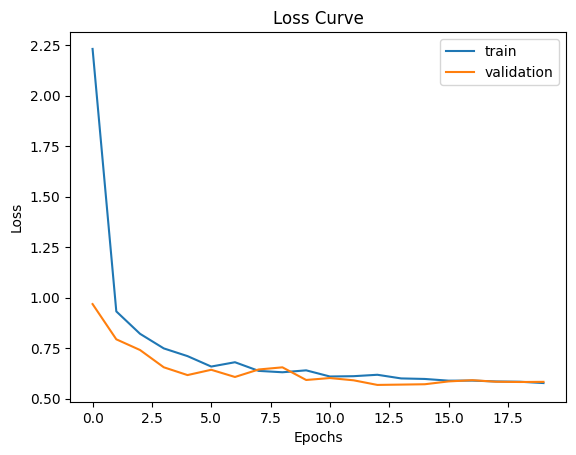

In [7]:
plt.title("Loss Curve")
plt.plot(loss, label="train")
plt.plot(val_loss, label="validation")
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

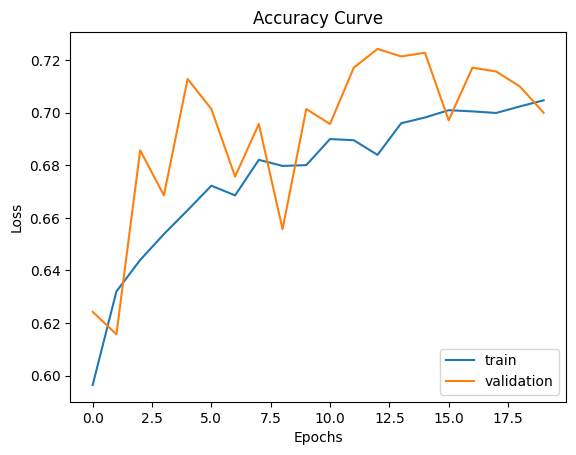

In [8]:
plt.title("Accuracy Curve")
plt.plot(accuracy, label="train")
plt.plot(val_accuracy, label="validation")
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

In [9]:
predictions = model.predict(X_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [10]:
true=numpy.ravel(y_test)
threshold=0.5
pred=predictions>threshold
cm = confusion_matrix(true, pred)

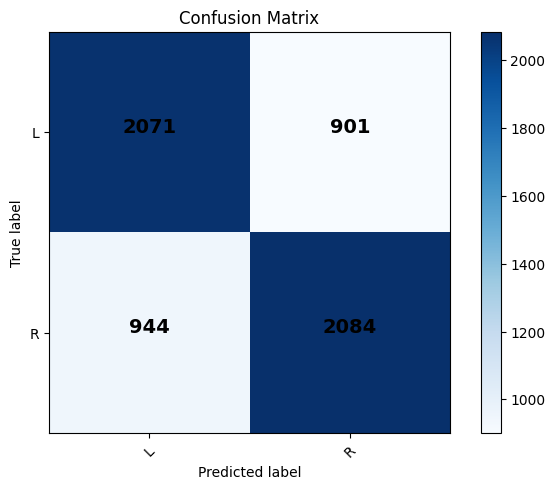

In [11]:
# Plotting
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = [0,1]
plt.xticks(tick_marks, ['L', 'R'], rotation=45)
plt.yticks(tick_marks, ['L', 'R'])

# Customizing text properties
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="black",
             fontweight='bold', fontsize=14)

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()